In [217]:
import json
import pandas as pd    
from IPython.display import JSON

data = list()

for i in range(3,4):
    filename = "data_" + str(i) + ".json"
    # Opening JSON file
    f = open(filename)

    # returns JSON object as 
    # a dictionary
    data_json = json.load(f)
    print(len(data_json))
    data += data_json

    f.close()

1994


In [218]:
print(data[10].keys())

dict_keys(['ClaimBucket'])


In [219]:
print(len(data))

1994


In [220]:
JSON(data[10])

<IPython.core.display.JSON object>

In [221]:
print(data[1003]['ClaimBucket']['claimIssue']['description'])

müşteri memnuniyeti açısından cezasız iadesi uygundur


In [222]:
df = pd.json_normalize(data)

In [223]:
df = df['ClaimBucket.claimIssue.description']

In [224]:
df.name = "description"

In [225]:
df[198]

'müşteri memnuniyeti açısından cezasız iadesi uygundur'

In [236]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from snowballstemmer import TurkishStemmer
from nltk import everygrams

turkStem= TurkishStemmer()

fdist = FreqDist()
fdistStem = FreqDist()
fdistBigram = FreqDist()
fdistBigramWithoutStopPunc = FreqDist()
fdistTrigram = FreqDist()

stop_words = set(stopwords.words('turkish'))

for text in df:
    word_tokens = word_tokenize(text.lower())
    word_without_stop_words = []
    
    filtered_sentence = []
    stemmed_filtered_sentence = []
    
    for w in word_tokens:
        if w not in stop_words and w.isalnum():
            stemmed_w = turkStem.stemWord(w)
            filtered_sentence.append(w)
            stemmed_filtered_sentence.append(stemmed_w)
            word_without_stop_words.append(w)
            
    fdistTrigram += nltk.FreqDist(everygrams(word_tokens, 3, 3))
    
    fdistBigram += nltk.FreqDist(nltk.bigrams(word_tokens))
    
    fdistBigramWithoutStopPunc += nltk.FreqDist(nltk.bigrams(word_without_stop_words))
            
    fdist += FreqDist(word.lower() for word in filtered_sentence)
    fdistStem += FreqDist(word.lower() for word in stemmed_filtered_sentence)

In [227]:
print("max occured word: ", fdist.max())
print("max occured stemmed word: ", fdistStem.max())

max occured word:  iadesi
max occured stemmed word:  iades


In [228]:
print("total word count: ", fdist.N())
print("unique word count: ", fdist.B())
print("\n### Stemmed")
print("total word count: ", fdistStem.N())
print("unique word count: ", fdistStem.B())

total word count:  15046
unique word count:  217

### Stemmed
total word count:  15046
unique word count:  185


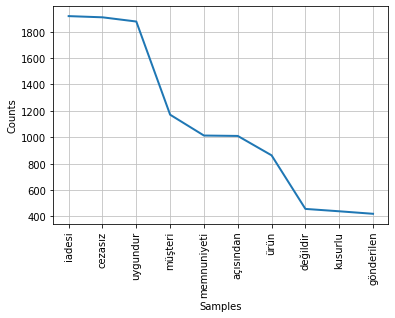

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [229]:
fdist.plot(10)

Stemmed Words


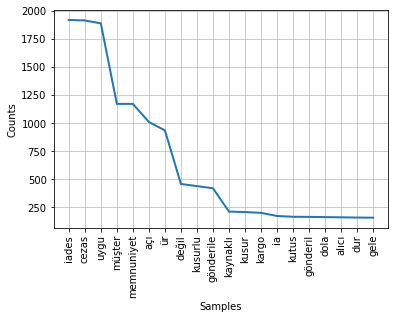

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [230]:
print("Stemmed Words")
fdistStem.plot(20)

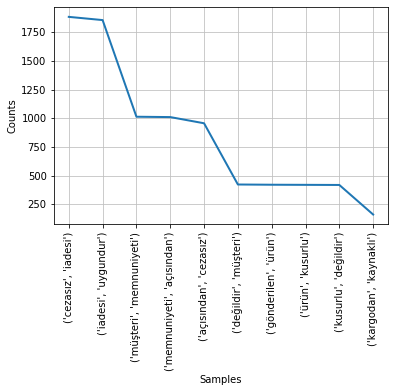

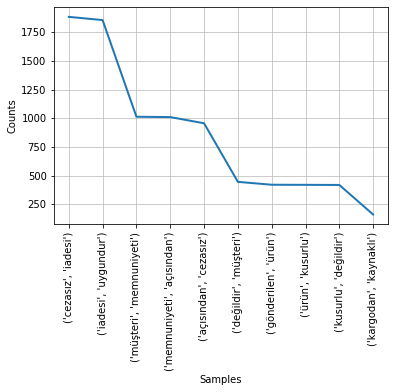

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [231]:
fdistBigram.plot(10)
fdistBigramWithoutStopPunc.plot(10)

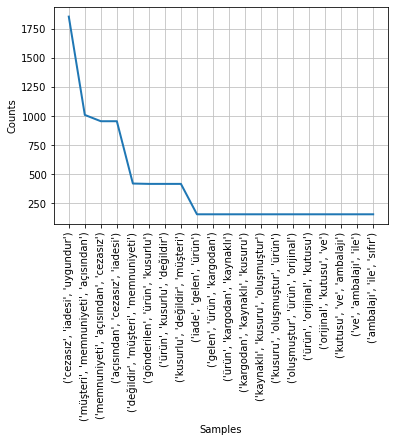

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [239]:
fdistTrigram.plot(20)

In [232]:
fdist.pprint(5)

FreqDist({'iadesi': 1918, 'cezasız': 1909, 'uygundur': 1877, 'müşteri': 1171, 'memnuniyeti': 1013, ...})


In [233]:
print("Stemmed")
fdistStem.pprint(5)

Stemmed
FreqDist({'iades': 1918, 'cezas': 1914, 'uygu': 1888, 'müşter': 1171, 'memnuniyet': 1171, ...})


In [234]:
import nltk

nltk.jaccard_distance(set("iade"), set("iadeyi"))

0.2